# Lab 2: Matrix vector multiplication
     
MTH 308: Applied Linear Algebra <br>
Spring 2022

Lab parts: 
- Part 1: Vector dot product, function error messages
- Part 2: Matrix vector multiplication example and function, Exercise 1 and 2
- Part 3: Efficiency and limits of nested for loops, Exercise 3

## Instructions

Run each of the coding cells. For example cells, understand the commands and check that the outputs make sense. For exercise cells, write your own code where indicated to generate the correct output.

<u>Submission:</u> Complete the following notebook in order. Once done, print the notebook and save as an HTML file. Upload your submission to the Canvas course page.

<u>Rubric:</u> 15 total points, 3 points to running example cells and saving outputs, 4 points per exercise block with correct output saved.

<u>Deadline:</u> Monday at midnight after the lab is assigned.

## Part 1: Vector dot product

Recall dot product definition of two vectors and how to calculate:
- Math summation definition
- Calculation within a for loop
- General function to compute the dot product

#### Dot product definition

Recall the dot product of two vectors is defined as
$$
\vec{a} \cdot \vec{b} = a_1 b_1 + a_2 b_2 + \dots a_n b_n = \sum_{i=1}^n a_i b_i
$$
for $n$-dimensional vectors $\vec{a}=[a_1,a_2,\dots,a_n]^T$ and $\vec{b}=[b_1,b_2,\dots,b_n]^T$. Note the dimension of $\vec{a}$ and $\vec{b}$ must be the same for the dot product to be defined. The dot product has many nice applications including comparing the direction of two vectors. See https://en.wikipedia.org/wiki/Dot_product for discussion.

#### Example dot product calculation

Here we use a for loop to calculate the dot product of vectors $\vec{a}=[3,1,4]^T$ and $\vec{b}=[2,1,7]^T$. The result we should get is
$$
\vec{a} \cdot \vec{b} = a_1b_1 + a_2b_2 + a_3b_3 = 3(2)+1(1)+4(7) = 6+1+28 = 35.
$$

In [1]:
##################
# EXAMPLE CELL
##################

# Press "SHIFT" + "ENTER" to execute each coding cell. You should follow the commands and ensure the results make sense.

# create example vectors
a <- c(3,1,4)
b <- c(2,1,7)


dotProd <- 0 # variable for storing dot product result
# use a for loop to compute the dot product
for (i in c(1:length(a))){
    dotProd <- dotProd + a[i]*b[i] # dot product formula iterated
}

print(dotProd) # print result

[1] 35


#### Function for dot product calculation

Here we create a general function for computing the dot product of any two vectors $\vec{a}$ and $\vec{b}$. Note, we will need to check that the dimension of these two vectors agree before computing. If the dimensions differ, an error message is generated.

In [2]:
##################
# EXAMPLE CELL
##################

# general function for dot product calculation
dotProdFun <- function(a,b) {
    
    # check if the dimensions of a and be are different, if so, return error message
    if (length(a) != length(b)){
        return("Error: Vector dimensions are not the same, you are crazy.")
    }
    
    dotProd <- 0 # variable for storing dot product result
    
    # use a for loop to compute the dot product
    for (i in c(1:length(a))){
        dotProd <- dotProd + a[i]*b[i] # dot product formula iterated
    }
    
    return(dotProd)
}

# test the function on above example
a <- c(3,1,4)
b <- c(2,1,7)
print(dotProdFun(a,b))

# note there are many open R libraries which have functions we can just use
# let's use one library routine to do this calculation
library(geometry) # load dot(.,.) function from geometry library, see documentation for details https://cran.r-project.org/web/packages/geometry/geometry.pdf
print(dot(a,b)) # call that function instead of ours

# test our function vectors whose dimension differ
a <- c(3,1,4,1,5)
b <- c(2,1,7)
print(dotProdFun(a,b))

# test our function on two large vectors
a <- c(1:50)
print(dotProdFun(a,a))

# test our function on two random vectors
a <- sample(c(1:100), size=50, replace=TRUE) # generate a random vector of dimension 50 by sampling set of integers 1,2,3,...,100
b <- sample(c(1:100), size=50, replace=TRUE)

print(dotProdFun(a,b))
print(dot(a,b)) # compare to library routine

[1] 35


[1] 35


[1] "Error: Vector dimensions are not the same, you are crazy."


[1] 42925


[1] 147090


[1] 147090


## Part 2: Matrix vector multiplication

Explore matrix vector multiplication:
- Considering the summation algorithm we developed in class
- Create a nested for loop implementation
- Create a general function which multiplies any matrix by a vector and generates an error if dimensions disagree

#### Matrix vector multiplication calculation

Consider multiplying matrix $A$ by vector $\vec{x}$ resulting in vector $\vec{b}$ as
$$
A \vec{x} = \vec{b}
$$
where the dimension of $A$ is $m \times n$, vector $\vec{x}$ must be of dimension $n$, and resulting vector $\vec{b}$ will be of dimension $m$.

Recall in class we derived the following summation formula for computing the $i$th entry of $\vec{b}$.
$$
b_i = \sum_{j=1}^n a_{ij} x_j
$$

### Exercise 1

Consider the following matrix $A$ and vector $\vec{x}$.
$$
A = \left[
\begin{array}{ccc}
1 & 2 & -1 \\
0 & -5 & 3
\end{array}
\right], \quad 
\vec{x} = \left[
\begin{array}{c}
4 \\ 3 \\ 7
\end{array}
\right]
$$
Here you will program the multiplication of $A \vec{x}$ to compute resulting vector $\vec{b}$. You should use the above dot product example code for reference.

In [3]:
##################
# EXERCISE CELL
##################

A <- matrix(c(1, 2, -1, 0, -5, 3), nrow=2, ncol=3, byrow=TRUE) # insert comment
x <- c(4,3,7)
print("A")
print(A)
print("x")
print(x)
print("You should compute A*x by hand to check your understanding")

b <- 0
# loop over entries of resulting vector b, expect one entry for each row of A
for (i in c(1:2)){
    b[i] <- 0 # ith entry, should update this value below
    
    ###################
    # beginning of your code, hint: you can either use a for loop or use the above dot product function
    
    b[i] <- dotProdFun(A[i,],x)
    
    # end of your code
    ###################

}

print("Your calculated b:")
print(b) # check your computed result
print("Check your calculated b is right:")
print(A %*% x) # compare to the built in R matrix multiplication routine


[1] "A"


     [,1] [,2] [,3]
[1,]    1    2   -1
[2,]    0   -5    3


[1] "x"


[1] 4 3 7


[1] "You should compute A*x by hand to check your understanding"


[1] "Your calculated b:"


[1] 3 6


[1] "Check your calculated b is right:"


     [,1]
[1,]    3
[2,]    6


### Exercise 2

Here you will code a function which computes the product of matrix $A$ with vector $\vec{x}$ and returns resulting vector $\vec{b}$. That is,
$$
A \vec{x} = \vec{b}.
$$
Your function will need to check if $A$ and $\vec{x}$ have compatible dimensions. If not, you should return an appropriate error message.

In [4]:
##################
# EXERCISE CELL
##################

matrixVecMultFun <- function(A,x){
        
    b <- rep(0,nrow(A)) # update this resulting vector below
    
    ###################
    # beginning of your code, make sure to return an error if dimensions of A and x aren't compatible
    
    # check if dimensions are incompatible
    if (ncol(A) != length(x)){
        return("Error: Dimensions are not compatible, you are crazy.")
    }
    
    # loop over entries of resulting vector b, expect one entry for each row of A
    for (i in c(1:nrow(A))){
    
        b[i] <- dotProdFun(A[i,],x)
    
    }
    
    # end of your code
    ###################
    
    return(b)
}

# test your function
A <- matrix(c(1, 2, -1, 0, -5, 3), nrow=2, ncol=3) # insert comment
x <- c(4,3,7)
b <- matrixVecMultFun(A,x)
print(b)
print(A %*% x)

# create 2 more examples of your own to test your function out, one should have incompatible dimensions
###################
# beginning of your code

# example 1
print("Example 1")
A <- matrix(c(1:12), nrow=3, ncol=4) # insert comment
x <- c(1,2,3,4)
b <- matrixVecMultFun(A,x)
print(b)
print(A %*% x)

# example 2
print("Example 2")
A <- matrix(c(1:12), nrow=3, ncol=4) # insert comment
x <- c(1,2,3)
b <- matrixVecMultFun(A,x)
print(b)
print(A %*% x)

    
# end of your code
###################

[1] -34  29


     [,1]
[1,]  -34
[2,]   29


[1] "Example 1"


[1] 70 80 90


     [,1]
[1,]   70
[2,]   80
[3,]   90


[1] "Example 2"


[1] "Error: Dimensions are not compatible, you are crazy."


ERROR: Error in A %*% x: non-conformable arguments


## Part 3: Computational limits of nested for loops

Using two nested for loops is a straightforward way to compute $A \vec{x}$, but it turns out to be rather slow for high dimensional problems. Here, you will explore the limitations of the matrix vector multiplication function you just created in comparison to the built in R routines. For more discussion on this computational challenge, see https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm.

[1]  7899  8280 12608  9098  8919


Time difference of 0.008626938 secs


      [,1]
[1,]  7899
[2,]  8280
[3,] 12608
[4,]  9098
[5,]  8919


Time difference of 0.006015301 secs


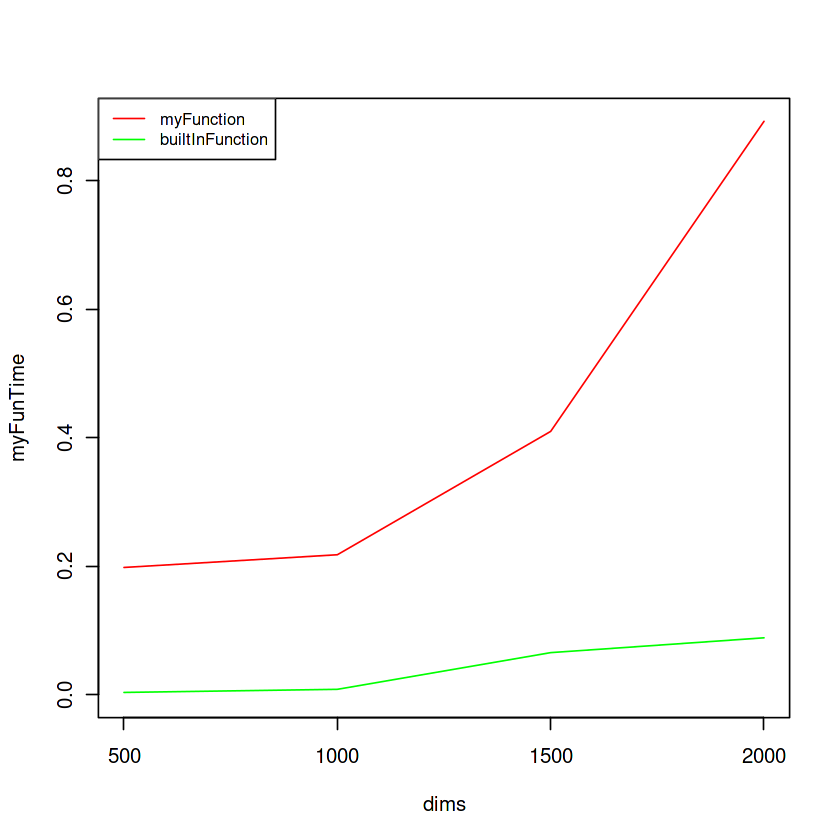

In [5]:
##################
# EXERCISE CELL
##################

n <- 5 # square matrix A dimension, vector x dimension
A <- matrix(sample(1:100,n^2,replace=TRUE),ncol=n) # random matrix A
x <- sample(1:100,n,replace=TRUE) # random vector x

start_time <- Sys.time()
print(matrixVecMultFun(A,x)) # compute b = Ax using your function
end_time <- Sys.time()
print(end_time - start_time) # compute elapsed compute time


start_time <- Sys.time()
print(A %*% x) # compute b = Ax using the built in R routine
end_time <- Sys.time()
print(end_time - start_time) # compute elapsed compute time


# Instruction:
# create your own experiment by increasing dimension n and comparing these two matrix vector multiplication methods
# you should at least consider n=10,100,1000,10000,etc or something simlar for dimensions
# generating a plot might be a nice approach
###################
# beginning of your code

dims <- seq(500,2000,by=500) # dimensions to iterate over

#compute times
myFunTime <- rep(0,length(dims))
builtInTime <- rep(0,length(dims))

for (i in c(1:length(dims))){
    n <- dims[i]
    
    A <- matrix(sample(1:100,n^2,replace=TRUE),ncol=n) # random matrix A
    x <- sample(1:100,n,replace=TRUE) # random vector x

    start_time <- Sys.time()
    b <- matrixVecMultFun(A,x) # compute b = Ax using your function
    end_time <- Sys.time()
    myFunTime[i] <- end_time - start_time # compute elapsed compute time

    start_time <- Sys.time()
    b <- A %*% x # compute b = Ax using the built in R routine
    end_time <- Sys.time()
    builtInTime[i] <-end_time - start_time
}

plot(dims,myFunTime, type='l', col='red', ylim=c(0,max(myFunTime)))
lines(dims,builtInTime, col='green')
legend('topleft',legend=c("myFunction","builtInFunction"), cex=.8, lty=1,col=c('red','green'))
    
# end of your code
###################